In [1]:
# Install packages (hopefully don't have to do this every time)
install.packages('lmerTest')
install.packages('emmeans')


The downloaded binary packages are in
	/var/folders/p7/xxmmp36n2_zcjxgs_qxhv2500000gn/T//Rtmpl35JiC/downloaded_packages

The downloaded binary packages are in
	/var/folders/p7/xxmmp36n2_zcjxgs_qxhv2500000gn/T//Rtmpl35JiC/downloaded_packages


In [2]:
library(lmerTest)
library(emmeans)

Loading required package: lme4

Loading required package: Matrix


Attaching package: ‘lmerTest’


The following object is masked from ‘package:lme4’:

    lmer


The following object is masked from ‘package:stats’:

    step




In [6]:
#read into csv file
#data <- read.csv('/Users/maansidesai/Box/timit_mt_how_much_data/kneepoint.csv')
#data <- read.csv('/Users/maansidesai/Box/timit_mt_how_much_data/kneepoint_MT.csv')
data <- read.csv('/Users/maansidesai/Box/timit_mt_how_much_data/kneepoint_TIMIT.csv')

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: "kneepoint ~ model + (1|subject)"
   Data: data

REML criterion at convergence: 622.4

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.3240 -0.5607  0.2264  0.5704  2.2087 

Random effects:
 Groups   Name        Variance Std.Dev.
 subject  (Intercept)  562.2   23.71   
 Residual             1195.3   34.57   
Number of obs: 64, groups:  subject, 16

Fixed effects:
              Estimate Std. Error      df t value Pr(>|t|)    
(Intercept)     96.125     10.481  45.909   9.172 6.02e-12 ***
modelenvelope  -15.062     12.224  45.000  -1.232    0.224    
modelphnfeat    -1.625     12.224  45.000  -0.133    0.895    
modelpitch       3.563     12.224  45.000   0.291    0.772    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr) mdlnvl mdlphn
modelenvelp -0.583              
modelphnfet -0.583  0.500       
modelpitch  

Cannot use mode = "kenward-roger" because *pbkrtest* package is not installed



,model,emmean,SE,df,lower.CL,upper.CL
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,auditory_training_data,96.1250,10.48064,45.90911,75.02743,117.2226
2,envelope,81.0625,10.48064,45.90911,59.96493,102.1601
3,phnfeat,94.5000,10.48064,45.90911,73.40243,115.5976
4,pitch,99.6875,10.48064,45.90911,78.58993,120.7851
,contrast,estimate,SE,df,t.ratio,p.value
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,auditory_training_data - envelope,15.0625,12.22369,45,1.2322385,0.6099819
2,auditory_training_data - phnfeat,1.6250,12.22369,45,0.1329386,0.9991482
3,auditory_training_data - pitch,-3.5625,12.22369,45,-0.2914423,0.9912621


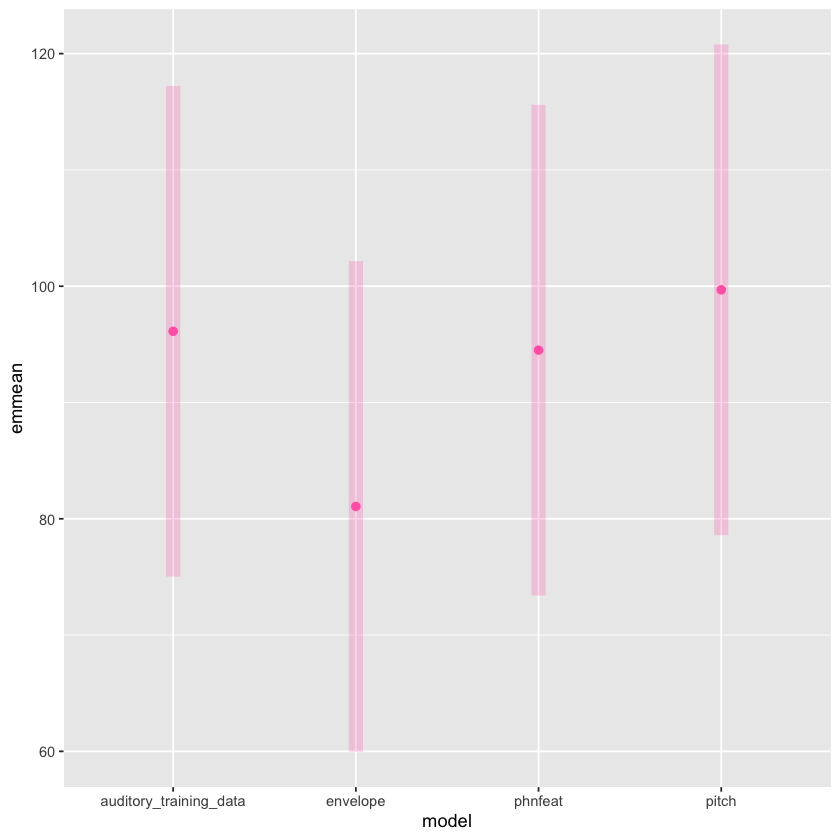

In [7]:
lm <- lmer("kneepoint ~ model + (1|subject)", data=data)
#lm <- lmer("kneepoint ~ model + stimulus_set + (1|subject)", data=data) #this would be TIMIT vs. MT for model type (fixed) vs. subjects for random effects

summary(lm)
em <- emmeans(lm, pairwise ~ model)

summary(em)
plot(em,by=NULL,horizontal=FALSE,colors='hotpink')


In [23]:
anova(lm) #main effect of model is not significant 

,Sum Sq,Mean Sq,NumDF,DenDF,F value,Pr(>F)
,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
model,12923.41,4307.802,3,108,0.5893673,6.232691e-01
stimulus_set,1387361.53,1387361.531,1,108,189.8103811,1.555772e-25
